In [1]:
from __future__ import print_function
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt




Using TensorFlow backend.


In [2]:
"""
Variables and dataset
"""

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_A, y_A), (x_B, y_B) = mnist.load_data()
(dataset_x, dataset_y) = (np.concatenate((x_A, x_B)), np.concatenate((y_A, y_B)))

#homogenize types 
dataset_x = dataset_x.astype('float32')
dataset_x /= 255

#make output to categorical
dataset_y = keras.utils.to_categorical(dataset_y, num_classes)

# We separate the dataset in 60% 20% 20%
(x_train, y_train) = (dataset_x[:42000], dataset_y[:42000])
(x_test, y_test) = (dataset_x[42000:56000], dataset_y[42000:56000])
(x_validate, y_validate) = (dataset_x[56000:70000], dataset_y[56000:72000])

In [3]:
"""
reshaping
"""

#reshaping
if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    x_validate = x_validate.reshape(x_validate.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    x_validate = x_validate.reshape(x_validate.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [4]:
"""
Training Model
"""

model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64,
                 (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [5]:
"""
fitting
"""

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_validate, y_validate)
                   )

score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy', score[1])

Train on 42000 samples, validate on 14000 samples
Epoch 1/12
42000/42000 [==============================] - 23s 549us/step - loss: 0.3429 - accuracy: 0.8933 - val_loss: 0.0711 - val_accuracy: 0.9784
Epoch 2/12
42000/42000 [==============================] - 17s 393us/step - loss: 0.1076 - accuracy: 0.9671 - val_loss: 0.0535 - val_accuracy: 0.9839
Epoch 3/12
42000/42000 [==============================] - 17s 405us/step - loss: 0.0790 - accuracy: 0.9766 - val_loss: 0.0396 - val_accuracy: 0.9882
Epoch 4/12
42000/42000 [==============================] - 16s 387us/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.0416 - val_accuracy: 0.9869
Epoch 5/12
42000/42000 [==============================] - 16s 383us/step - loss: 0.0513 - accuracy: 0.9853 - val_loss: 0.0362 - val_accuracy: 0.9889
Epoch 6/12
42000/42000 [==============================] - 16s 378us/step - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.0361 - val_accuracy: 0.9891
Epoch 7/12
42000/42000 [==============================] 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


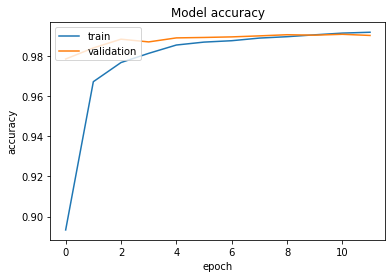

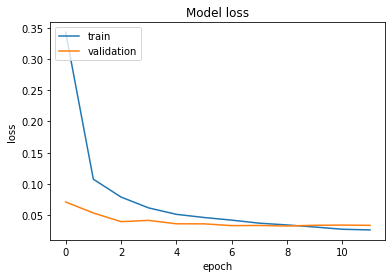

In [6]:
"""
ploting training data
"""
# get all keys of of history
print(history.history.keys())


#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()